<a href="https://colab.research.google.com/github/seemantkaushal/Machine-Learning/blob/main/Handwritten%20digit%20recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opendatasets
!pip install pandas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import opendatasets as od

# Loading Data Set

In [9]:
# df=pd.read_csv("/train.csv")
od.download("https://www.kaggle.com/datasets/oddrationale/mnist-in-csv?select=mnist_train.csv")

Skipping, found downloaded files in "./mnist-in-csv" (use force=True to force download)
Skipping, found downloaded files in "./mnist-in-csv" (use force=True to force download)


In [10]:
df=pd.read_csv("/content/mnist-in-csv/mnist_train.csv")

In [11]:
df.head()
# df.shape

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df.isnull()
df=df.dropna()

In [13]:
df.shape

(60000, 785)

In [14]:
df.info()
df=df.astype("int32")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [15]:
plx=np.reshape((df.iloc[5:6,1:].values),(28,28))


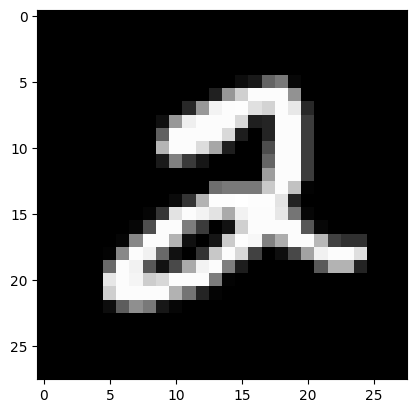

In [16]:
plt.imshow(plx,cmap="gray")

In [17]:
y=df["label"]
x=df.drop("label",axis=1)

In [20]:
x

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
y

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: label, Length: 60000, dtype: int32

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

In [25]:
X_train.shape

(48000, 784)

In [26]:
Y_train.shape

(48000,)

**we have used the KNN classifier for the classifications of digit based on thier pixel value **


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score,accuracy_score

In [28]:
knn=KNeighborsClassifier(n_neighbors=5)

In [29]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [30]:
Y_predict=knn.predict(X_test)

In [31]:
accuracy = accuracy_score(Y_test, Y_predict)
print("Accuracy:", accuracy)

Accuracy: 0.9715


**Checking the accuracy of the Algorithm , as we see we get an accuracy of 0.9715**